Build a random forest classifier to predict the risk of heart disease based on a dataset of patient information. The dataset contains 303 instances with 14 features, including age, sex, chest pain type, resting blood pressure, serum cholesterol, and maximum heart rate achieved.

Dataset link: https://drive.google.com/file/d/1bGoIE4Z2kG5nyh-fGZAJ7LH0ki3UfmSJ/view?usp=share_link

Q1. Preprocess the dataset by handling missing values, encoding categorical variables, and scaling the numerical features if necessary.
Q2. Split the dataset into a training set (70%) and a test set (30%).
Q3. Train a random forest classifier on the training set using 100 trees and a maximum depth of 10 for each tree. Use the default values for other hyperparameters.
Q4. Evaluate the performance of the model on the test set using accuracy, precision, recall, and F1 score.
Q5. Use the feature importance scores to identify the top 5 most important features in predicting heart disease risk. Visualise the feature importances using a bar chart.
Q6. Tune the hyperparameters of the random forest classifier using grid search or random search. Try different values of the number of trees, maximum depth, minimum samples split, and minimum samples leaf. Use 5-fold cross-validation to evaluate the performance of each set of hyperparameters.
Q7. Report the best set of hyperparameters found by the search and the corresponding performance metrics. Compare the performance of the tuned model with the default model.
Q8. Interpret the model by analysing the decision boundaries of the random forest classifier. Plot the decision boundaries on a scatter plot of two of the most important features. Discuss the insights and limitations of the model for predicting heart disease risk.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('dataset.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
cat_features=['sex', 'cp', 'fbs', 'restecg', 'exang','slope', 'ca', 'thal', 'oldpeak']
num_features = ['age', 'trestbps', 'chol', 'thalach']

## Check for class imbalance

In [6]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

### Observation:

The dataset is imbalanced, it is expected that the model will not perform good for class 0 data

In [7]:
# dependent and independent features
y = df.pop('target')
x = df

In [8]:
# split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=24)

### Scaling numerical features

In [9]:
# scale the numerical features
scaler = MinMaxScaler()
x_train[num_features] = scaler.fit_transform(x_train[num_features])
x_test[num_features] = scaler.transform(x_test[num_features])

In [10]:
x_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
77,0.581395,1,1,0.433962,0.216895,0,1,0.750000,1,0.0,2,0,2
109,0.372093,0,0,0.150943,0.292237,0,0,0.709677,0,0.0,2,0,2
230,0.302326,1,2,0.132075,0.267123,0,1,0.653226,0,0.0,2,0,2
226,0.651163,1,1,0.245283,0.353881,0,0,0.258065,0,1.4,1,1,3
46,0.232558,1,2,0.433962,0.248858,0,0,0.879032,0,0.0,2,0,2


In [11]:
clf = RandomForestClassifier(n_estimators=100, max_depth=10)
clf.fit(x_train,y_train)

RandomForestClassifier(max_depth=10)

In [12]:
y_pred = clf.predict(x_test)

In [13]:
# classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.74      0.78        42
           1       0.79      0.86      0.82        49

    accuracy                           0.80        91
   macro avg       0.80      0.80      0.80        91
weighted avg       0.80      0.80      0.80        91



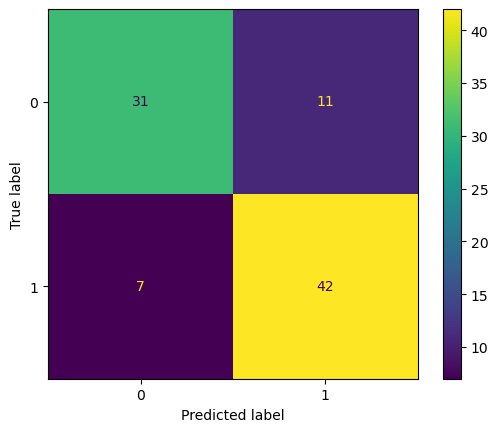

In [14]:
# confusion matrix
ConfusionMatrixDisplay.from_estimator(clf, x_test, y_test)

plt.show()

### Observation:

As expected, the model is not performing well on the minority class (class 0)

In [15]:
# get feature importances and sort them in descending order
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

# print the top 5 features
print("Top 5 features:")
for i in range(5):
    print("%d. %s (%f)" % (i + 1, x_train.columns[indices[i]], importances[indices[i]]))

Top 5 features:
1. thalach (0.148720)
2. oldpeak (0.147995)
3. thal (0.109566)
4. cp (0.099053)
5. age (0.085712)


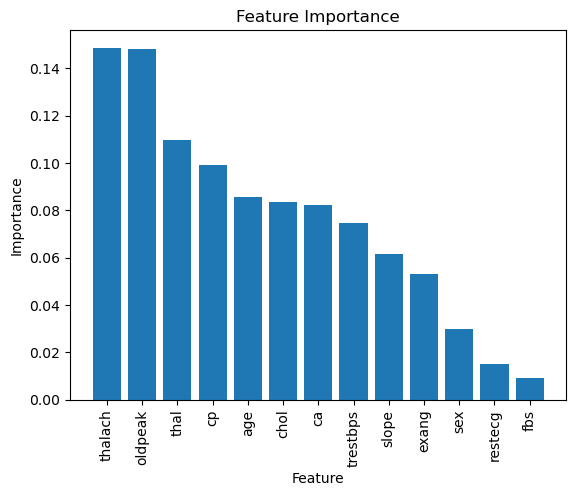

In [16]:
# plot feature importances in a bar chart
plt.bar(range(x_train.shape[1]), importances[indices], align='center')
plt.xticks(range(x_train.shape[1]), x_train.columns[indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

In [17]:
# define the hyperparameter grid to search over
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# create a grid search object with 5-fold cross-validation
grid_search = GridSearchCV(clf, param_grid, cv=5)

# fit the grid search object on the training data
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=10),
             param_grid={'max_depth': [10, 20, 30, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]})

In [18]:
# print the best hyperparameters and corresponding mean cross-validation score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best mean cross-validation score: ", grid_search.best_score_)

Best hyperparameters:  {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Best mean cross-validation score:  0.8491694352159469


### Decision boundry of two of the most important features

In [19]:
# choose the two most important features
feature1, feature2 = importances.argsort()[-2:]
print(feature1, feature2)

9 7


In [20]:
rfc = RandomForestClassifier()
rfc.fit(x_train[['thalach','oldpeak']], y_train)

RandomForestClassifier()

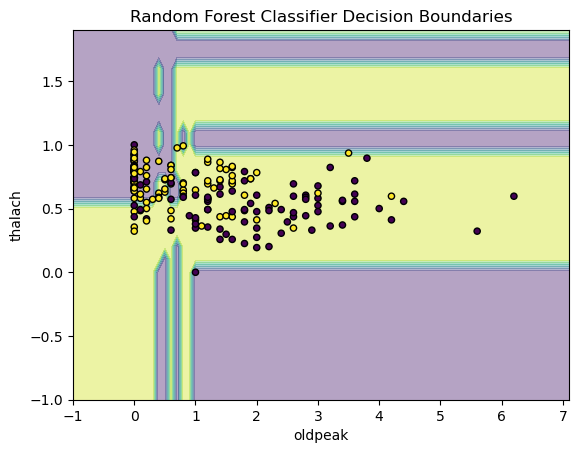

In [21]:
# create a grid of points covering the range of the two features
x_min, x_max = x_train.iloc[:, feature1].min() - 1, x_train.iloc[:, feature1].max() + 1
y_min, y_max = x_train.iloc[:, feature2].min() - 1, x_train.iloc[:, feature2].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# predict the class of each point in the grid
Z = rfc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# plot the decision boundaries on a scatter plot of the two features
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(x_train.iloc[:, feature1], x_train.iloc[:, feature2], c=y_train, s=20, edgecolor='k')
plt.xlabel(x_train.columns[feature1])
plt.ylabel(x_train.columns[feature2])
plt.title('Random Forest Classifier Decision Boundaries')
plt.show()

### Observation

Its hard to interpret the above decision boundry plot because the model trained for this plot was only trained on two features (the best features), and the model is having a hard time finding a concrete boundry between the two classed based on only two features. Because two features are not enough to separate one class from another properly.

### Limitations and Insights

Well first of all there are only 303 samples in the dataset so its not enough for training a more accurate and robust model.
The dataset is imbalanced so the model will always perform bad on classfying the minority class (unless we handle it by using a technique like upsampling, downsampling or SMOTE etc.)
We're achieving 80 percent accuracy but like mentioned already the model is performing poorly on class 0 data and so i will never suggest such a model to be deployed without addressing the above mentioned issues.